# Assignment 4 #
### Due: Friday, October 27th to be submitted via Canvas by 11:59 pm ###
### Total points: **80** ###

## Q1. (10 points) Bayes Optimal Classifier

Consider a one-dimensional dataset  $(X)$ that consists of data from three different classes - $\{c_1, c_2, c_3\}$.  Data from class $c_1$ are distributed according to $Uniform[-1,1]$, those from $c_2$ are distributed according to $Uniform[-2,2]$ and those from $c_3$ are distributed according to $Uniform[-4,4]$.
The priors for the three classes are:
$\mathbb{P} (c_1) = \frac{1}{2}$,   $\mathbb{P} (c_2) = \frac{1}{3}$,
  $\mathbb{P} (c_3) = \frac{1}{6}$.

Now, we want to build a 3-class classifier based on bayes optimal decision theory to predict the most likely label for any given data point.

a. (2 points) Write down the class-conditional data distributions for each of the classes defined above.

b. (4 points). Derive the Bayes optimal decision boundaries for this problem.

c. (4 points) What is the Bayes Error rate for this classifier?

## Q2. (10 points) Multi-class Logistic Regression Derivation

To use Logistic Regression for multi-class setting with K classes - $\{1,2, ... K\}$, we need to learn $K-1$ $d$-dimensional weight vectors, $\{w_1, w_2, ..., w_{K-1}\}$ which then provide the posterior probabilities for each class in the following way -

\begin{align}
  \mathbb{P} (y = k|x) =
  \begin{cases}
                                   \dfrac{exp(w_k^Tx)}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for }k \in [1,K-1] \\
                                   \dfrac{1}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for } k = K
  \end{cases}
\end{align}

Suppose you are given a dataset $(X,Y)$ consisting of $N$ data-points where each $x$ is in $d$-dimensions, and $y \in [1, 2, ... K]$.

a. (3 points) Write down the total conditional likelihood of observing the corresponding y's for the given x's in the dataset, under the model specified above.

b. (7 points) Derive the update equation for any $w_i$ that can be used to learn $w_i$ via gradient descent.

## Q3. (25 points) Introduction to PyTorch

In this exercise, you will be introduced to PyTorch through an example on SVHN (Street View House Numbers) classification.
If you want to run it locally, please check out this [link](https://pytorch.org/get-started/locally/) to install PyTorch. Otherwise, you can just use Google Colab.

Here is a [tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for you to quickly to get familiar with PyTorch and finish the problems below.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sn
import pandas as pd


a. (5 points) Load the SVHN dataset from torchvision.datasets with the transform specified below and show the first 5 images of the training set.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



In [ ]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

# Load SVHN training and testing datasets from torchvision.datasets
### START CODE ###
train_dataset = None
test_dataset = None
### END CODE ###

In [ ]:
f, axarr = plt.subplots(1,5)
transform = torchvision.transforms.ToPILImage()
axarr[0].imshow(transform(train_dataset[0][0]))
axarr[1].imshow(transform(train_dataset[1][0]))
axarr[2].imshow(transform(train_dataset[2][0]))
axarr[3].imshow(transform(train_dataset[3][0]))
axarr[4].imshow(transform(train_dataset[4][0]))

b. (5 points) Split out 20% of the training set as the validation set and construct three data loaders: train_dataloader, val_dataloader, and test_dataloader. For the data loaders, set the batch sizes to 256 and set the train_dataloader to shuffled, which randomizes the mini-batch samples.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)







In [ ]:
train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
### START CODE ###
train_dataset, val_dataset = None
### END CODE ###


# Create data loaders
### START CODE ###
train_loader = None
val_loader = None
test_loader = None
### END CODE ###

c. (5 points) Build a multiple layer perceptron with the following sequential structure:


*   Fully connected layer mapping from 32 * 32 * 3 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 10 dimensions

Then, create an model with the MLP class and an Adam optimizer that will be optimizing the MLP's parameters. Set the initial learning rate to be 0.001.

Tutorial reference:
*   [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)




In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        x = x.view(-1, 32*32*3)
        ### START CODE ###
        ### END CODE ###
        return x


In [ ]:
model = MLP()
# Create the optimizer
### START CODE ###
optimizer = None
### END CODE ###

d. (5 points) Write training and evaluation subroutines per epoch (one full pass of the dataset). Then, train the model for 20 epochs using these subroutines.

Tutorial reference:
*   [Optimizing model parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)



In [ ]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = None
        ### END CODE ###

        # Use the optimizer to perform backpropagation
        ### START CODE ###
        ### END CODE ###

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = None
        ### END CODE ###

        # Get model's prediction
        ### START CODE ###
        pred = None
        ### END CODE ###

        # Count number of correct predictions
        ### START CODE ###
        correct = None
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc


In [ ]:
epochs = 15
for e in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_acc = eval(model, val_loader)
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

e. (5 points) Evaluate your model's accuracy and confusion matrix on the test set. Print the test accuracy and plot the confusion matrix.

In [ ]:
model.eval()
total_correct = 0
total_num = 0
all_y_true = []
all_y_pred = []
with torch.no_grad():
    for data, target in tqdm(test_loader):
        out = model(data)
        # Get model's prediction
        ### START CODE ###
        pred = None
        ### END CODE ###

        # Get number of correct predictions
        ### START CODE ###
        correct = None
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_num += batch_size

        # Collect target into the all_y_true list and pred into the all_y_pred list for confusion matrix
        ### START CODE ###
        ### END CODE ###

test_acc = total_correct / total_num
print(f"Test accuracy: {test_acc}")

# Obtain confusion matrix
### START CODE ###
cm = None
### END CODE ###


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                         columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Q4. (10 points) Bayesian Belief Networks

a) (3 points) Consider two BNNs given below. Suppose you installed two different anti-virus systems which use different algorithms for detection to efficiently detect all infections that can affect your system. Which of the following two BBNs below capture the independence assumptions of this setting correctly?

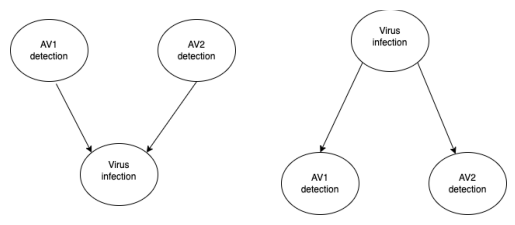

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline
img_A = mpimg.imread('hwq.drawio (3).png')
img_B = mpimg.imread('hwq.drawio (4).png')

fig, ax = plt.subplots(1,2)
fig.patch.set_visible(False)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)

b) (7 points) From the first Bayesian network, compute $\mathbb{P}$(AV2 detection = T| AV1 detection = T , Virus infection = T). Use the following probability tables for the computation.

P(AV1 detection = T) = 0.1 \\
P(AV2 detection = T) = 0.2 \\

P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8 \\
P(Virus infection = T | AV1 detection = T, AV2 detection = F) = 0.7 \\
P(Virus infection = T | AV1 detection = F, AV2 detection = T) = 0.6 \\
P(Virus infection = T | AV1 detection = F, AV2 detection = F) = 0.5 \\

## Q5. (25 points) Classification using Sklearn and Model Evaluation

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving customer_churn_telcom.csv to customer_churn_telcom.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv', index_col = [0])

In [ ]:
#lets print the first five rows
df.head()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

## [5 points] Data Preprocessing and Splitting

In [ ]:
# Replacing values of 'no internet service' and 'no phone service' with the value  'No'

## CODE HERE ##

(a) **[1 pt]** Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(b) **[1 pt]** Convert all  'Female' values to 1 and 'Male' values to 0

In [ ]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

## CODE HERE ##

(c) **[1 pt]** Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [ ]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

## CODE HERE ##

df2 = None

In [ ]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

d) **[2 pt]** Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training dataset further into training (80%) and validation sets (20%) with a random state of 15. Again perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function.

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X = None
y = None

# Write code to make train and test splits
## START CODE ##

## END CODE ##

In [ ]:
# Write code to make train and validation splits

## START CODE ##

## END CODE ##

In [ ]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

## [20 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.



Helpful resources for this question can be found here -
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

(a) **[12 pts]** Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models. <br>

In [ ]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## CODE HERE ##


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

## CODE HERE ##

In [ ]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

## CODE HERE ##

(b) **[4 pts]** Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions).

In [ ]:
# Plot ROC curves

from sklearn.metrics import roc_curve, roc_auc_score

## CODE HERE ##

(c) **[4 pts]** Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

In [ ]:
# Plot Precision-Recall curves

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

## CODE HERE ##